# **RENEWABLE ENERGY AND WEATHER CONDITIONS**

# **Problem Statement**

The dataset offers a rich source of information for examining how weather conditions influence renewable energy generation, especially solar energy. Understanding these relationships is key to optimizing energy production and forecasting renewable energy supply, as weather has a significant impact on solar radiation and wind energy. The problem is to analyze this relationship and predict future renewable energy generation based on weather patterns. This can help energy companies improve energy forecasting, optimize grid management, and plan for energy shortages or surpluses.

**Approaches**

●	**Correlation Analysis**: Analyze the correlation between weather conditions (e.g., temperature, humidity, cloud coverage) and renewable energy production (e.g., energy delta, GHI) to identify key factors influencing energy generation.

●	**Time Series Forecasting**: Use time series models (e.g., ARIMA, Prophet) to forecast future energy generation based on historical data and weather conditions.

●	**Machine Learning Models**: Apply supervised learning models (e.g., Random Forests, Gradient Boosting) to predict energy consumption or production based on weather features such as GHI, temperature, and wind speed.

●	**Seasonality and Trend Analysis**: Identify and model seasonal effects and long-term trends in renewable energy generation across different months and hours of the day.

●	**Anomaly Detection**: Detect anomalies in energy production and consumption related to unusual weather events, such as heavy rainfall or cloud cover, using unsupervised learning techniques.

**Use Cases**

●	Renewable Energy Forecasting: Predict future renewable energy generation, especially solar, based on expected weather conditions.

●	Energy Grid Optimization: Optimize energy grid management by forecasting renewable energy production and adjusting for weather-related fluctuations.

●	Weather-Based Energy Efficiency: Assess how weather patterns influence energy consumption efficiency and identify opportunities to reduce energy usage or enhance energy production.

●	Climate Impact Studies: Analyze how long-term climate changes (e.g., rising temperatures or increased precipitation) could affect renewable energy production, particularly solar and wind energy.

●	Energy Supply and Demand Management: Use weather-forecasting data to balance supply and demand in energy systems, ensuring more stable and efficient energy distribution.




# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
#from prophet import Prophet

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import joblib

from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm

print("All packages uploaded successfully")


All packages uploaded successfully


In [2]:
# Load dataset
df = pd.read_csv("D:/Data Science Classes/Machine Learning/Group Assignment/Mock Project/Renewable Energy and Weather Conditions/solar_weather.csv")

In [3]:
#inspect the first five rows
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [4]:
#print column names of the data
list(df.columns)

['Time',
 'Energy delta[Wh]',
 'GHI',
 'temp',
 'pressure',
 'humidity',
 'wind_speed',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'isSun',
 'sunlightTime',
 'dayLength',
 'SunlightTime/daylength',
 'weather_type',
 'hour',
 'month']

In [5]:
#print the data types of each of the column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [6]:
# Convert Time column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract useful time features: date and year
df['year'] = df['Time'].dt.year

In [7]:
#Data Correction: converting the sunlightTime & dayLength from minutes to hours
df['sunlightTime'] = df['sunlightTime']/60
df['dayLength'] = df['dayLength']/60

In [8]:
df

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,year
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.00,7.50,0.00,4,0,1,2017
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.00,7.50,0.00,4,0,1,2017
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.00,7.50,0.00,4,0,1,2017
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.00,7.50,0.00,4,0,1,2017
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0.00,7.50,0.00,4,1,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,13.00,13.75,0.95,3,16,8,2022
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,13.25,13.75,0.96,3,17,8,2022
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,13.50,13.75,0.98,3,17,8,2022
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,13.75,13.75,1.00,3,17,8,2022


In [9]:
#check the sum of the null values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
year                      0
dtype: int64


In [10]:
#determine the statistics summary
df.describe()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,year
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,2019-10-29 22:44:12.085620992,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,3.528685,12.477406,0.265187,3.198398,11.498902,6.298329,2019.345042
min,2017-01-01 00:00:00,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,0.000000,1.000000,0.000000,1.000000,2017.000000
25%,2018-06-02 10:26:15,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,9.500000,0.000000,2.000000,5.000000,3.000000,2018.000000
50%,2019-10-28 20:52:30,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,0.500000,12.750000,0.050000,4.000000,11.000000,6.000000,2019.000000
75%,2021-03-24 07:18:45,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,6.500000,15.500000,0.530000,4.000000,17.000000,9.000000,2021.000000
max,2022-08-31 17:45:00,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,17.000000,17.000000,1.000000,5.000000,23.000000,12.000000,2022.000000
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,4.565036,3.247837,0.329023,1.289939,6.921887,3.376066,1.636537


In [11]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,year
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.0,7.5,0.0,4,0,1,2017
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.0,7.5,0.0,4,0,1,2017
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.0,7.5,0.0,4,0,1,2017
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0.0,7.5,0.0,4,0,1,2017
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0.0,7.5,0.0,4,1,1,2017


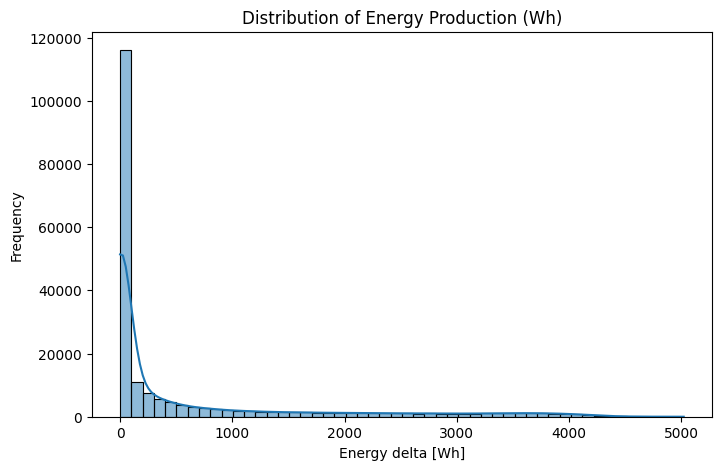

In [12]:
# --- Distribution of Energy production
plt.figure(figsize=(8,5))
sns.histplot(df['Energy delta[Wh]'], bins=50, kde=True)
plt.title("Distribution of Energy Production (Wh)")
plt.xlabel("Energy delta [Wh]")
plt.ylabel("Frequency")
plt.show()


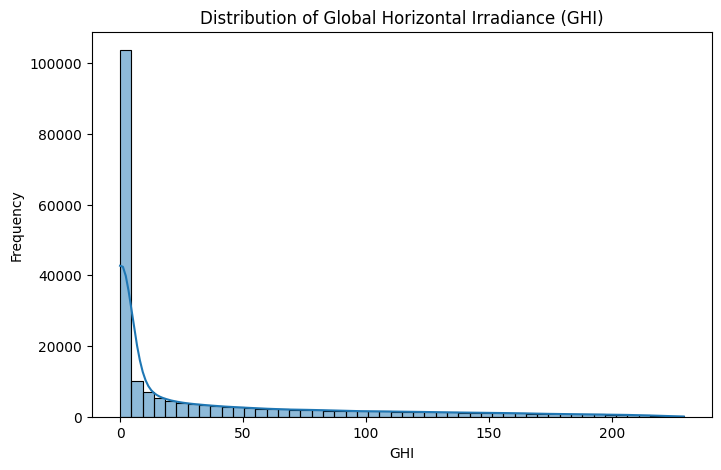

In [13]:
# --- GHI Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['GHI'], bins=50, kde=True)
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

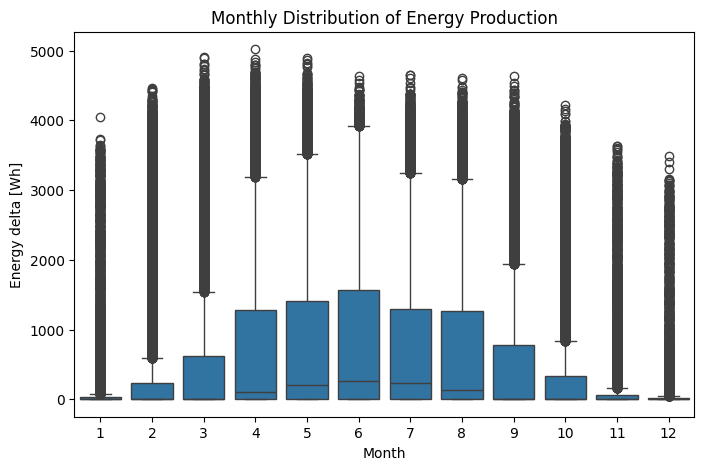

In [14]:
# --- Monthly Distribution of Energy Production
plt.figure(figsize=(8,5))
sns.boxplot(x='month', y='Energy delta[Wh]', data=df)
plt.title("Monthly Distribution of Energy Production")
plt.xlabel("Month")
plt.ylabel("Energy delta [Wh]")
plt.show()

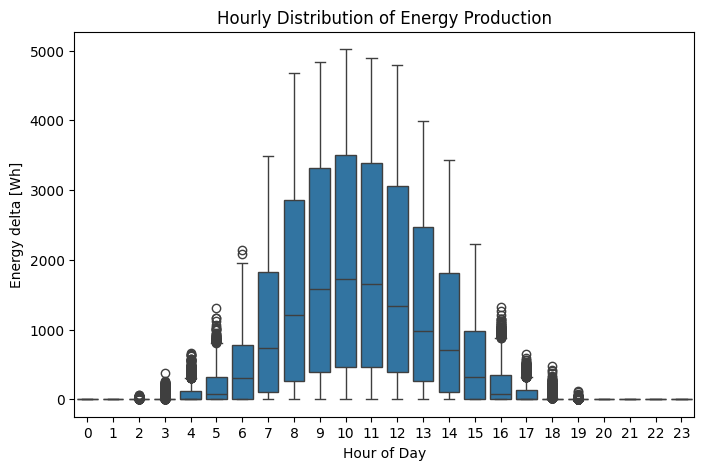

In [15]:
# --- Hourly Distribution of Energy Production
plt.figure(figsize=(8,5))
sns.boxplot(x='hour', y='Energy delta[Wh]', data=df)
plt.title("Hourly Distribution of Energy Production")
plt.xlabel("Hour of Day")
plt.ylabel("Energy delta [Wh]")
plt.show()

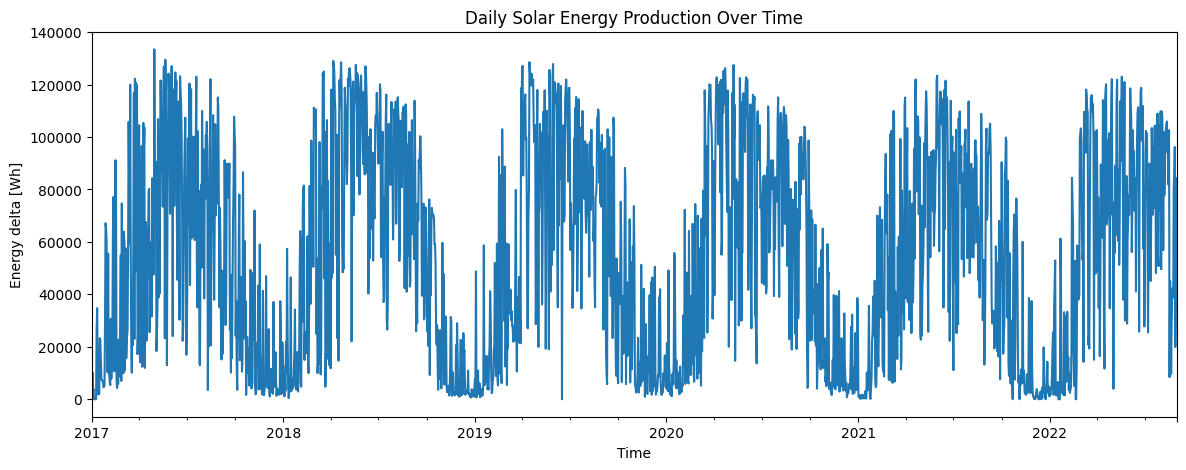

In [16]:
# --- Daily Trend (resampled)
daily_energy = df.set_index('Time')['Energy delta[Wh]'].resample('D').sum() #aggregating Solar energy values into daily averages
plt.figure(figsize=(14,5))
daily_energy.plot()
plt.title("Daily Solar Energy Production Over Time")
plt.ylabel("Energy delta [Wh]")
plt.show()

# Anomaly Detection
Detect anomalies in energy production and consumption related to unusual weather events, such as heavy rainfall or cloud cover, using unsupervised learning techniques.

## Using 3σ rule 

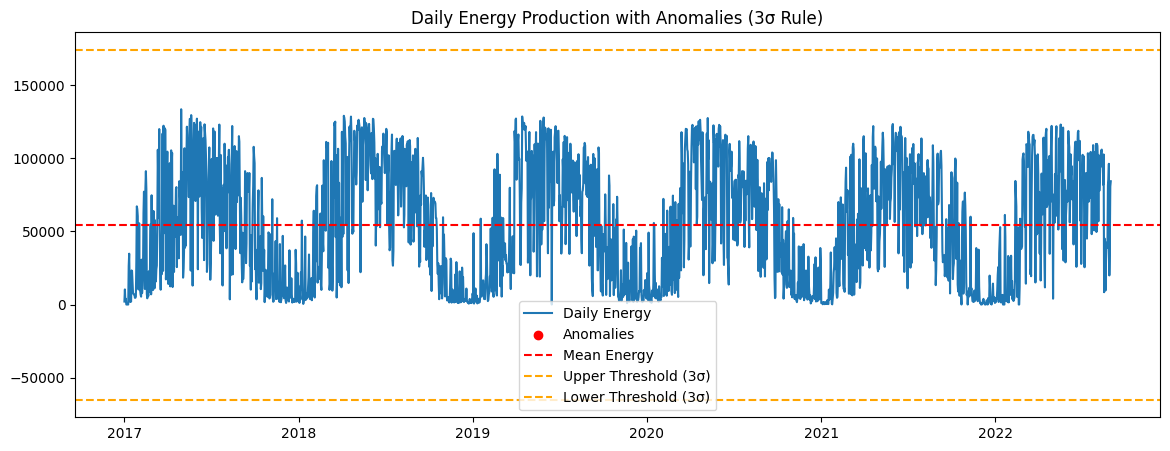

In [17]:
# --- Anomaly Detection (3σ rule)
# Uses the 3-sigma (standard deviation) rule to flag anomalies: beyond 3 standard deviations from the mean

# Detect anomalies for Energy delta
mean_energy = daily_energy.mean()
std_energy = daily_energy.std()
threshold_up = mean_energy + 3*std_energy
threshold_low = mean_energy - 3*std_energy

anomalies_energy = daily_energy[(daily_energy > threshold_up) | (daily_energy < threshold_low)]

# Plot with anomalies
plt.figure(figsize=(14,5))
plt.plot(daily_energy.index, daily_energy.values, label="Daily Energy")
#Creates time series plots of daily energy and daily GHI with anomalies highlighted in red
plt.scatter(anomalies_energy.index, anomalies_energy.values, color='red', label="Anomalies")
plt.axhline(mean_energy, color='red', linestyle="--", label="Mean Energy")
#Adds threshold lines so you can see when energy or irradiance goes outside normal rangesplt.axhline(threshold_up, color='orange', linestyle="--", label="Upper Threshold (3σ)")
plt.axhline(threshold_up, color='orange', linestyle="--", label="Upper Threshold (3σ)")
plt.axhline(threshold_low, color='orange', linestyle="--", label="Lower Threshold (3σ)")
plt.title("Daily Energy Production with Anomalies (3σ Rule)")
plt.legend()
plt.show()

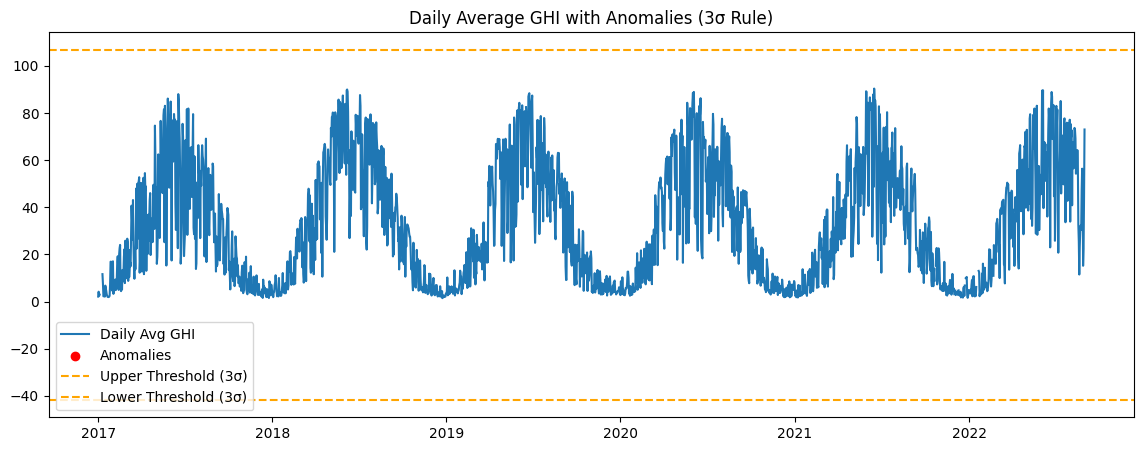

In [18]:
# Detect anomalies for GHI
daily_ghi = df.set_index('Time')['GHI'].resample('D').mean() #aggregating GHI values into daily averages
mean_ghi = daily_ghi.mean()
std_ghi = daily_ghi.std()
threshold_up_ghi = mean_ghi + 3*std_ghi
threshold_low_ghi = mean_ghi - 3*std_ghi

anomalies_ghi = daily_ghi[(daily_ghi > threshold_up_ghi) | (daily_ghi < threshold_low_ghi)]

# Plot with anomalies
plt.figure(figsize=(14,5))
plt.plot(daily_ghi.index, daily_ghi.values, label="Daily Avg GHI")
plt.scatter(anomalies_ghi.index, anomalies_ghi.values, color='red', label="Anomalies")
plt.axhline(threshold_up_ghi, color='orange', linestyle="--", label="Upper Threshold (3σ)")
plt.axhline(threshold_low_ghi, color='orange', linestyle="--", label="Lower Threshold (3σ)")
plt.title("Daily Average GHI with Anomalies (3σ Rule)")
plt.legend()
plt.show()

## Using IQR Rule

Detected 0 anomalies out of 2069 days.


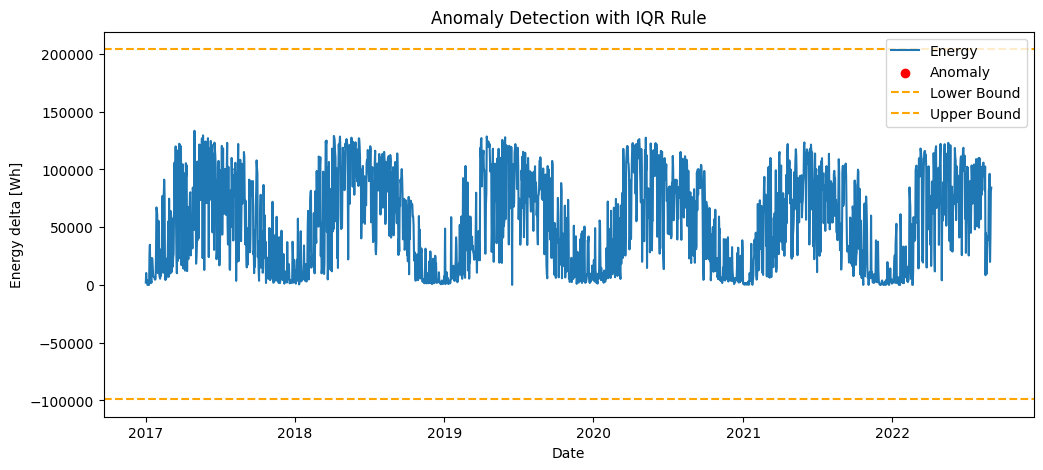

In [19]:
# Compute daily totals (or means if needed)
daily_energy = df.set_index("Time")["Energy delta[Wh]"].resample("D").sum().reset_index()

# IQR calculation
Q1 = daily_energy["Energy delta[Wh]"].quantile(0.25)
Q3 = daily_energy["Energy delta[Wh]"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect anomalies
daily_energy["Anomaly"] = (
    (daily_energy["Energy delta[Wh]"] < lower_bound) |
    (daily_energy["Energy delta[Wh]"] > upper_bound)
)

print(f"Detected {daily_energy['Anomaly'].sum()} anomalies out of {len(daily_energy)} days.")

# Plot
plt.figure(figsize=(12,5))
plt.plot(daily_energy["Time"], daily_energy["Energy delta[Wh]"], label="Energy")
plt.scatter(
    daily_energy.loc[daily_energy["Anomaly"], "Time"],
    daily_energy.loc[daily_energy["Anomaly"], "Energy delta[Wh]"],
    color="red", label="Anomaly"
)
plt.axhline(lower_bound, color="orange", linestyle="--", label="Lower Bound")
plt.axhline(upper_bound, color="orange", linestyle="--", label="Upper Bound")
plt.title("Anomaly Detection with IQR Rule")
plt.xlabel("Date")
plt.ylabel("Energy delta [Wh]")
plt.legend()
plt.show()

## Using ML Methods: Unsupervised Learning Techniques


=== Anomaly Detection Summary ===
Total records: 196776
Anomalies detected: 1968 (1.00%)

Anomalies per Month:
 month
1     101
2     121
3     295
4     232
5     185
6     506
7     182
8     249
9      31
10     23
11     12
12     31
Name: count, dtype: int64

Anomalies by Cloud Cover:
 cloud_bin
0-25%      353
25-50%     153
50-75%     187
75-100%    843
Name: count, dtype: int64

Anomalies by Rainfall:
 rain_bin
0mm       1520
0-2mm      197
2-5mm      220
5-10mm      31
Name: count, dtype: int64


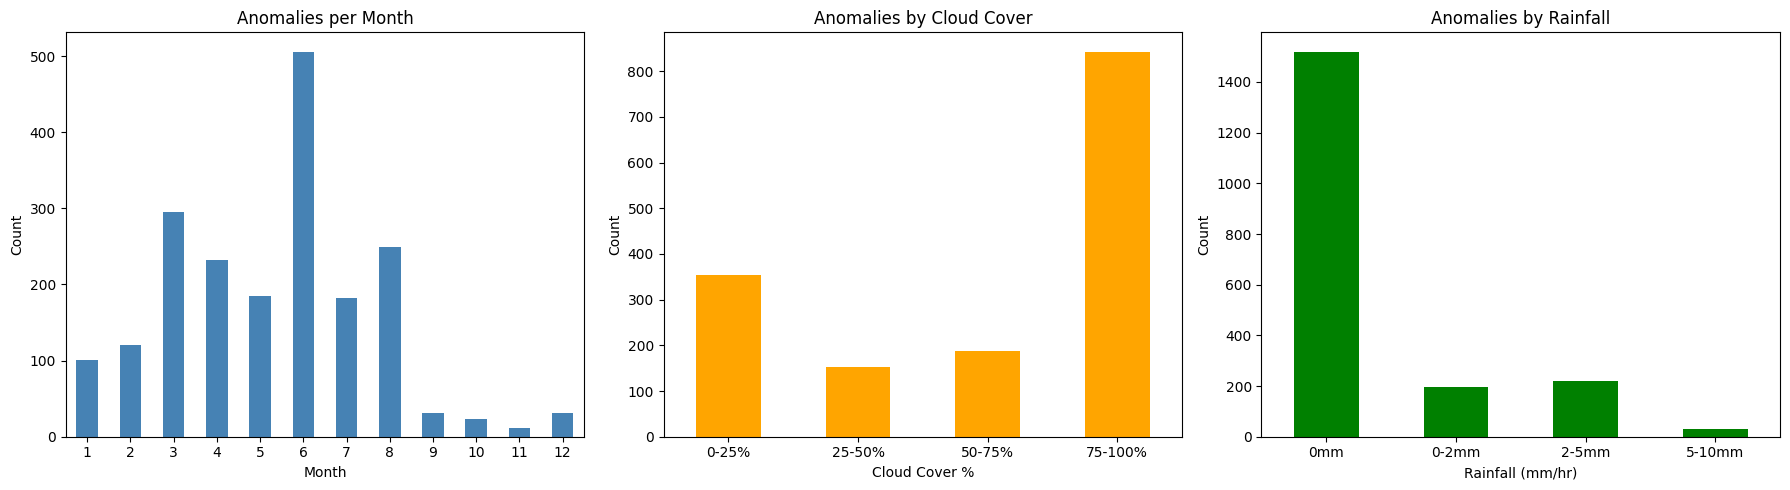

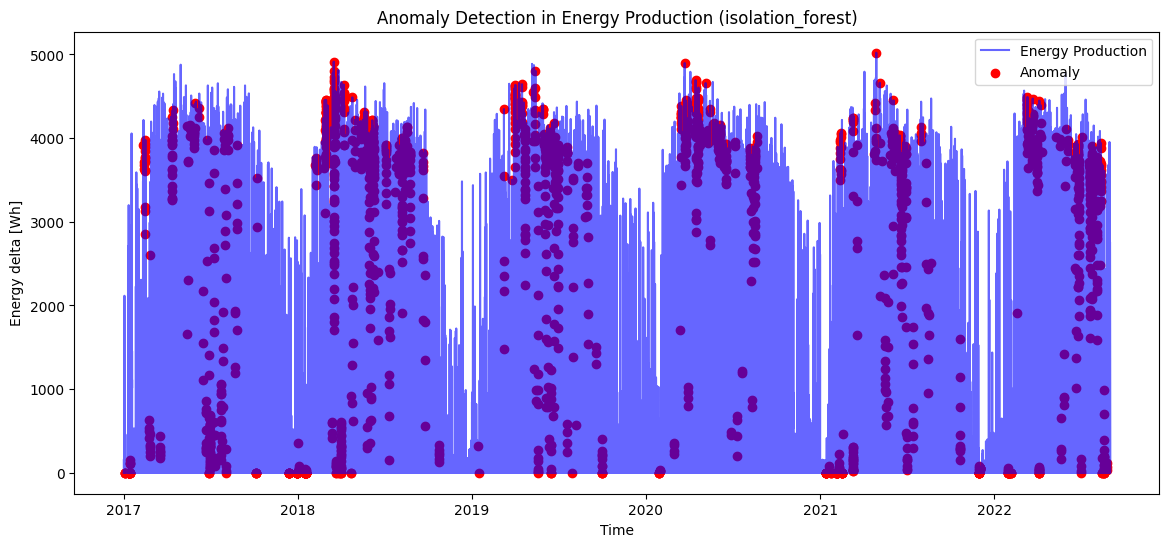

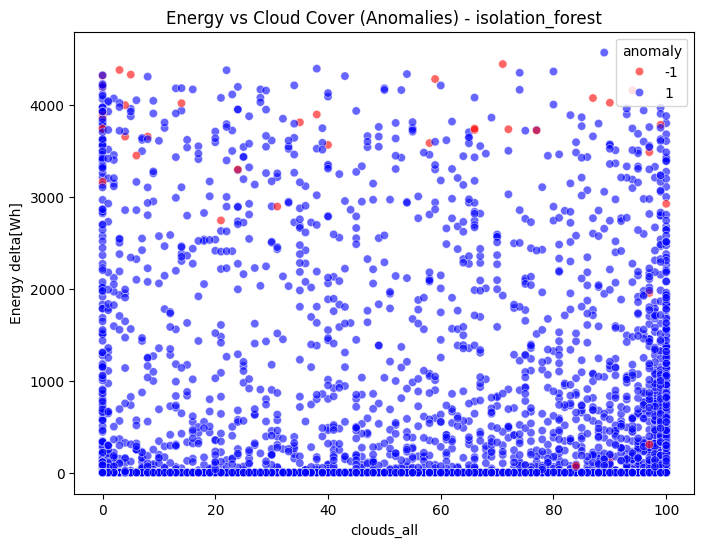

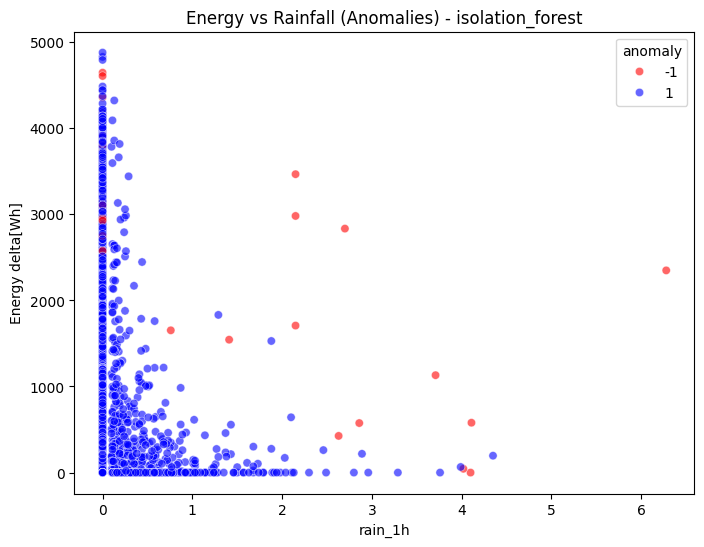

In [20]:
# Unsupervised Anomaly Detection

def detect_weather_anomalies(df, features, method="isolation_forest", contamination=0.01, eps=0.5, min_samples=20, plot=True, summary=True):
    """
    Detect anomalies in energy production based on weather conditions.
    
    Parameters
    ----------
    df : pd.DataFrame
        Dataset containing 'Time', weather variables, and energy output.
    features : list
        List of columns to use for anomaly detection.
    method : str, default "isolation_forest"
        Algorithm: "isolation_forest", "oneclass_svm", or "dbscan".
    contamination : float, default 0.01
        Proportion of anomalies expected (only for IsolationForest, OneClassSVM).
    eps : float, default 0.5
        Neighborhood distance (only for DBSCAN).
    min_samples : int, default 20
        Minimum cluster size (only for DBSCAN).
    plot : bool, default True
        Plot anomalies in time series and scatter plots.
    
    Returns
    -------
    df : pd.DataFrame
        Original dataframe with 'anomaly' and 'anomaly_score' columns.
    """
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    
    if method == "isolation_forest":
        model = IsolationForest(contamination=contamination, random_state=42)
        anomaly_labels = model.fit_predict(X_scaled)
        anomaly_scores = model.decision_function(X_scaled)
    
    elif method == "oneclass_svm":
        model = OneClassSVM(nu=contamination, kernel="rbf", gamma="scale")
        anomaly_labels = model.fit_predict(X_scaled)
        anomaly_scores = model.decision_function(X_scaled)
    
    elif method == "dbscan":
        model = DBSCAN(eps=eps, min_samples=min_samples)
        anomaly_labels = model.fit_predict(X_scaled)
        # For DBSCAN, noise points (-1) are anomalies
        anomaly_scores = np.where(anomaly_labels == -1, -1, 1)
    else:
        raise ValueError("Method must be 'isolation_forest', 'oneclass_svm', or 'dbscan'")
    
    # Add results to dataframe
    df = df.copy()
    df['anomaly'] = anomaly_labels
    df['anomaly_score'] = anomaly_scores
    
    #SUMMARY REPORT
    if summary:
        total = len(df)
        anomalies = (df['anomaly'] == -1).sum()
        print("\n=== Anomaly Detection Summary ===")
        print(f"Total records: {total}")
        print(f"Anomalies detected: {anomalies} ({anomalies/total*100:.2f}%)")
        
        # Bin clouds and rain for analysis
        df['cloud_bin'] = pd.cut(df['clouds_all'], bins=[0,25,50,75,100], labels=["0-25%","25-50%","50-75%","75-100%"])
        df['rain_bin'] = pd.cut(df['rain_1h'], bins=[-0.1,0,2,5,10], labels=["0mm","0-2mm","2-5mm","5-10mm"])
        
        # Count anomalies
        monthly_anomalies = df[df['anomaly']==-1]['month'].value_counts().sort_index()
        cloud_anomalies = df[df['anomaly']==-1]['cloud_bin'].value_counts().sort_index()
        rain_anomalies = df[df['anomaly']==-1]['rain_bin'].value_counts().sort_index()
        
        print("\nAnomalies per Month:\n", monthly_anomalies)
        print("\nAnomalies by Cloud Cover:\n", cloud_anomalies)
        print("\nAnomalies by Rainfall:\n", rain_anomalies)
        
    
        # Plots for Summary
        fig, axes = plt.subplots(1, 3, figsize=(18,5))
        
        monthly_anomalies.plot(kind="bar", ax=axes[0], color="steelblue",)
        axes[0].set_title("Anomalies per Month")
        axes[0].set_xlabel("Month")
        axes[0].set_ylabel("Count")
        axes[0].tick_params(axis='x', rotation=0)
        
        
        cloud_anomalies.plot(kind="bar", ax=axes[1], color="orange")
        axes[1].set_title("Anomalies by Cloud Cover")
        axes[1].set_xlabel("Cloud Cover %")
        axes[1].set_ylabel("Count")
        axes[1].tick_params(axis='x', rotation=0)
        
        rain_anomalies.plot(kind="bar", ax=axes[2], color="green")
        axes[2].set_title("Anomalies by Rainfall")
        axes[2].set_xlabel("Rainfall (mm/hr)")
        axes[2].set_ylabel("Count")
        axes[2].tick_params(axis='x', rotation=0)
        
        plt.tight_layout()
        plt.show()   


    #VISUALIZATION
    if plot:
        # Time series plot
        plt.figure(figsize=(14,6))
        plt.plot(df['Time'], df['Energy delta[Wh]'], label="Energy Production", color="blue", alpha=0.6)
        plt.scatter(df.loc[df['anomaly']==-1, 'Time'], 
                    df.loc[df['anomaly']==-1, 'Energy delta[Wh]'], 
                    color="red", label="Anomaly")
        plt.title(f"Anomaly Detection in Energy Production ({method})")
        plt.xlabel("Time")
        plt.ylabel("Energy delta [Wh]")
        plt.xticks(rotation=0)
        plt.legend()
        plt.show()
        
        # Scatter vs clouds
        plt.figure(figsize=(8,6))
        sns.scatterplot(x="clouds_all", y="Energy delta[Wh]", hue="anomaly", 
                        data=df.sample(5000), palette={1:"blue", -1:"red"}, alpha=0.6)
        plt.title(f"Energy vs Cloud Cover (Anomalies) - {method}")
        plt.xticks(rotation=0)
        plt.show()
        
        # Scatter vs rainfall
        plt.figure(figsize=(8,6))
        sns.scatterplot(x="rain_1h", y="Energy delta[Wh]", hue="anomaly", 
                        data=df.sample(5000), palette={1:"blue", -1:"red"}, alpha=0.6)
        plt.title(f"Energy vs Rainfall (Anomalies) - {method}")
        plt.xticks(rotation=0)
        plt.show()
    
    return df


# ---------------------------------------

features = ["Energy delta[Wh]", "GHI", "temp", "humidity", "wind_speed", 
            "rain_1h", "snow_1h", "clouds_all"]

# Run anomaly detection with Isolation Forest
df_anomalies = detect_weather_anomalies(df, features, method="isolation_forest", contamination=0.01)

# Run anomaly detection with One-Class SVM
# df_anomalies = detect_weather_anomalies(df, features, method="oneclass_svm", contamination=0.01)

# Run anomaly detection with DBSCAN
#df_anomalies = detect_weather_anomalies(df, features, method="dbscan", eps=0.6, min_samples=30)

In [21]:
df_anomalies.columns


Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month', 'year', 'anomaly', 'anomaly_score', 'cloud_bin',
       'rain_bin'],
      dtype='object')

In [22]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month', 'year'],
      dtype='object')

# **Correlation Analysis** #
Analyze the correlation between weather conditions (e.g. temperature, humidity, cloud coverage) and renewable energy production (e.g., energy delta, GHI) to identify key factors influencing energy generation.

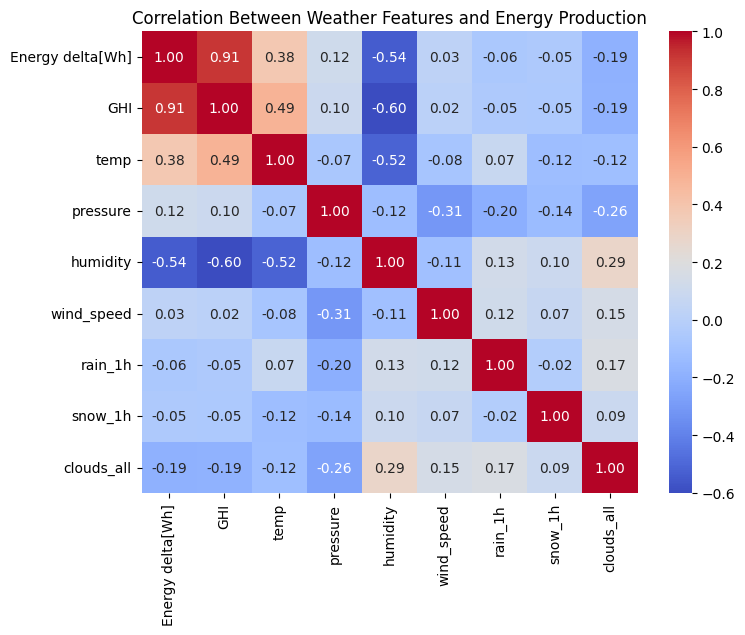

In [23]:
# --- Correlation Heatmap between weather and energy

plt.figure(figsize=(8,6))
corr = df[['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
           'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather Features and Energy Production")
plt.show()

# Seasonality and Trend Analysis  for Solar Energy
Identify and model seasonal effects and long-term trends in renewable energy generation across different months and hours of the day.

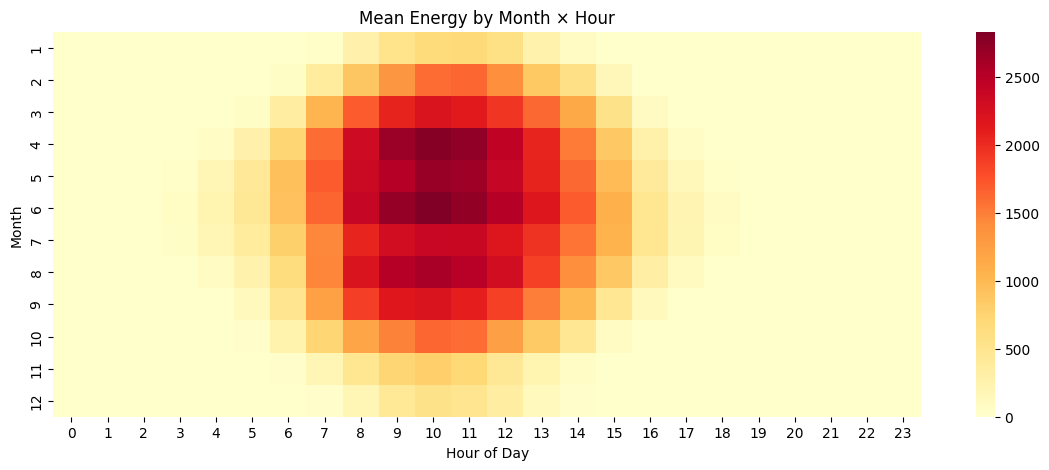

In [24]:
# -- Month × Hour seasonality
# TARGET
y_col = "Energy delta[Wh]"

# Aggregate mean energy by month & hour
mh = (
    df.groupby(["month","hour"], as_index=False)[y_col]
      .mean()
      .rename(columns={y_col:"mean_energy"})
)

# Heatmap: which months/hours are strongest
pv = mh.pivot(index="month", columns="hour", values="mean_energy")
plt.figure(figsize=(14,5))
sns.heatmap(pv, cmap="YlOrRd")
plt.title("Mean Energy by Month × Hour")
plt.xlabel("Hour of Day"); plt.ylabel("Month"); plt.show()

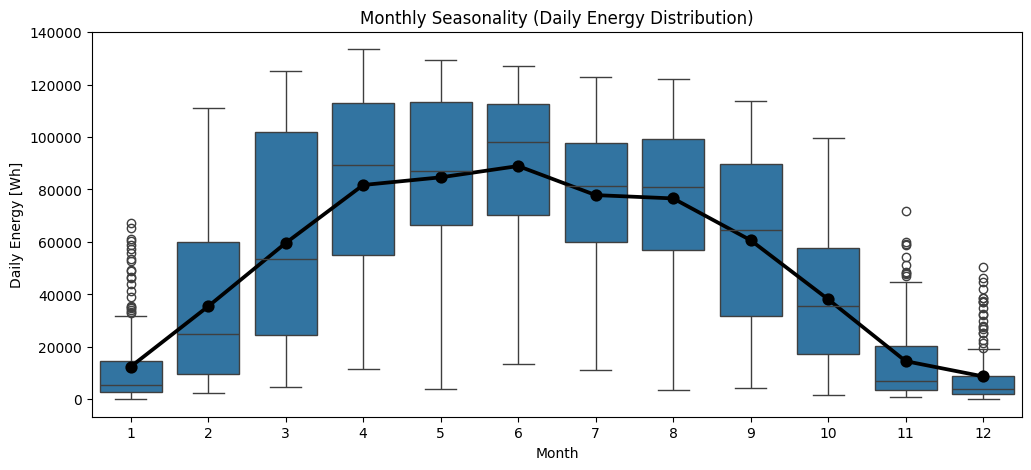

In [25]:
# ---- Monthly Seasonality

# Aggregate daily totals and keep month
df1=df.copy()
df1['date'] = df1['Time'].dt.date
daily_month = df1.groupby(df1["date"], as_index=False)[y_col].sum()
daily_month["month"] = pd.to_datetime(daily_month["date"]).dt.month
daily_month = daily_month.rename(columns={y_col: "daily_energy"})

plt.figure(figsize=(12,5))
sns.boxplot(data=daily_month, x="month", y="daily_energy")
sns.pointplot(data=daily_month, x="month", y="daily_energy", color="black", errorbar=None)
plt.title("Monthly Seasonality (Daily Energy Distribution)")
plt.xlabel("Month"); plt.ylabel("Daily Energy [Wh]"); plt.show()

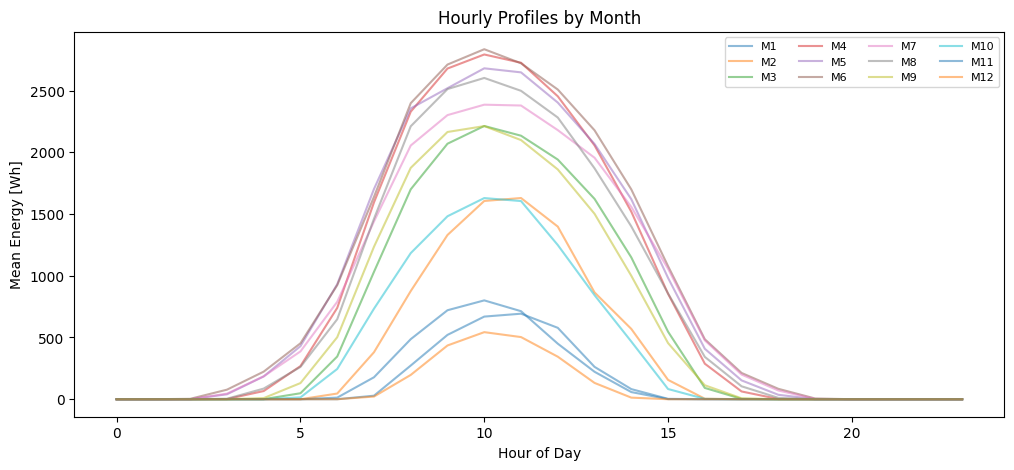

In [26]:
# --- Hourly Profiles by Month
plt.figure(figsize=(12,5))
for m in sorted(mh["month"].unique()):
    sub = mh[mh["month"]==m]
    plt.plot(sub["hour"], sub["mean_energy"], alpha=0.5, label=f"M{m}")
plt.title("Hourly Profiles by Month")
plt.xlabel("Hour of Day"); plt.ylabel("Mean Energy [Wh]")
plt.legend(ncol=4, fontsize=8)
plt.show()

# Machine Learning Models
Apply supervised learning models (e.g., Random Forests, Gradient Boosting) to predict energy consumption or production based on weather features such as GHI, temperature, and wind speed.

## Splitting the data

In [28]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month', 'year'],
      dtype='object')

In [29]:
#Drop columns that are categorical and derived from other variables within the file
df =  df.drop(columns=['isSun', 'SunlightTime/daylength', 'weather_type',])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Energy delta[Wh]','Time'])  # Only numeric features
y = df['Energy delta[Wh]']

# Normalize or scale features using StandardScaler or MinMaxScaler from sklearn.preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets using train_test_split from sklearn.model_selection.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (157420, 13)
Test set shape: (39356, 13)


## Train Machine Learning Models

d:\Data Science Classes\Machine Learning\Group Assignment\Mock Project\Renewable Energy and Weather Conditions\.virtualenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



=== Model Performance Comparison ===
                         RMSE         MAE        R²
XGBoost            250.112139  103.625732  0.943231
LightGBM           250.642116  104.406830  0.942990
Random Forest      251.873440  103.313126  0.942429
Gradient Boosting  264.971796  111.966753  0.936285
Linear Regression  401.838149  236.037234  0.853465
Ridge Regression   401.838463  236.025999  0.853465


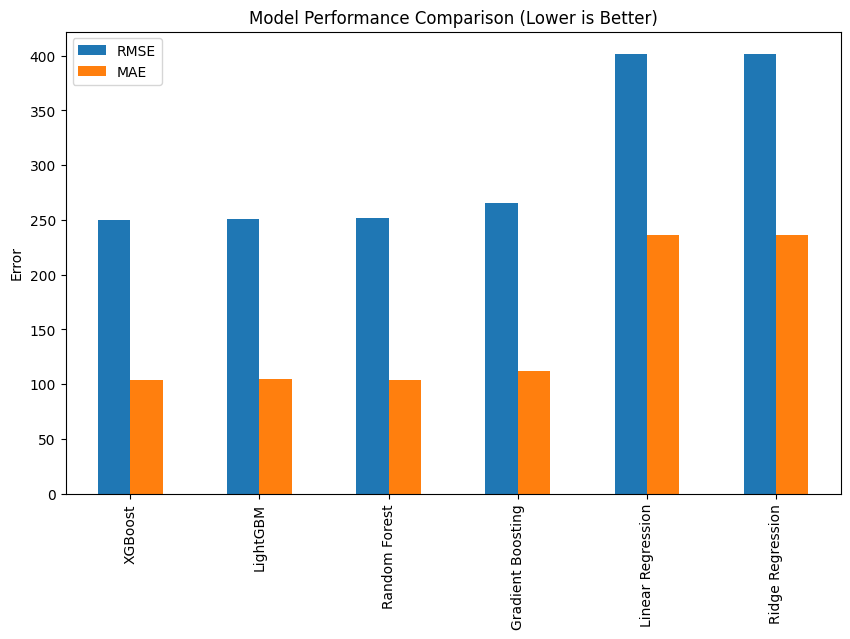


=== Model Performance Comparison ===
                         RMSE         MAE        R²
XGBoost            250.112139  103.625732  0.943231
LightGBM           250.642116  104.406830  0.942990
Random Forest      251.873440  103.313126  0.942429
Gradient Boosting  264.971796  111.966753  0.936285
Linear Regression  401.838149  236.037234  0.853465
Ridge Regression   401.838463  236.025999  0.853465

 Best model: XGBoost


In [32]:
# Supervised ML: Multiple Models Benchmark
'''
#DEFAULT SETTINGS
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.1, max_depth=-1, random_state=42, n_jobs=-1, verbose=-1),
}
'''
#APPLYING HYPER PARAMETER TUNING TO THE MODELS
models = {
    # Linear models
    "Linear Regression": LinearRegression(n_jobs=-1),
    "Ridge Regression": Ridge(alpha=10.0),  # stronger regularization, to reuduce variance
    
    # Tree-based models
    "Random Forest": RandomForestRegressor(
        n_estimators=300,          # more trees → better stability
        max_depth=20,              # limit depth to avoid overfitting
        min_samples_split=5,       # require more samples to split
        min_samples_leaf=2,        # avoid overly small leaves
        max_features="sqrt",       # best practice for regression
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=500,          # more boosting stages
        learning_rate=0.05,        # smaller learning rate
        max_depth=6,
        min_samples_split=5,
        min_samples_leaf=2,
        subsample=0.8,             # stochastic boosting
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=8,
        min_child_weight=3,        # min data per leaf
        colsample_bytree=0.8,
        subsample=0.8,
        reg_lambda=1.0,            # L2 regularization
        reg_alpha=0.0,             # L1 regularization
        random_state=42,
        n_jobs=-1,
        verbosity=0
    ),
    
    "LightGBM": LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=-1,              # let it grow, constrained by leaves
        num_leaves=64,             # controls complexity
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ),
}


#Train, Predict and Evaluate the models
results = {}

for name, model in models.items():
    #fit with dataframe (keep feature names)
    model.fit(X_train, y_train)

    #predict also with dataframe to avoid warnings
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}
    #print(f"{name} -> RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

# Results Comparison
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("\n=== Model Performance Comparison ===")
print(results_df)

# Plot comparison
results_df[["RMSE", "MAE"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison (Lower is Better)")
plt.ylabel("Error")
plt.show()

# Convert to DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print("\n=== Model Performance Comparison ===")
print(results_df)

# Select best by Lowest RMSE
best_model_name = results_df.index[0]
print(f"\n Best model: {best_model_name}")


## Auto Hyperparameter Tuning

In [ ]:
# Define Models and Search Spaces
param_distributions = {
    "Linear Regression": (LinearRegression(), {}),
    "Ridge Regression": (
        Ridge(),
        {"alpha": np.logspace(-3, 3, 20)}
    ),
    "Random Forest": (
        RandomForestRegressor(random_state=42, n_jobs=-1),
        {
            "n_estimators": [200, 300, 500],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2", None]
        }
    ), 
    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [200, 500, 800],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [3, 5, 7],
            "min_samples_split": [2, 5, 10],
            "subsample": [0.6, 0.8, 1.0]
        }
    ),
    "XGBoost": (
        XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
        {
            "n_estimators": [300, 500, 800],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [4, 6, 8],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0],
            "min_child_weight": [1, 3, 5]
        }
    ),
    "LightGBM": (
        LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),
        {
            "n_estimators": [500, 800, 1200],
            "learning_rate": [0.01, 0.05, 0.1],
            "num_leaves": [31, 64, 128],
            "max_depth": [-1, 10, 20],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0]
        }
    ),
}


# Run Tuning
results = {}
best_model = None
best_name = None
best_score = float("inf")

for name, (model, params) in param_distributions.items():
    print(f"\n Tuning {name} ...")
    if params:  # if hyperparameters to tune
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=20,
            scoring="neg_root_mean_squared_error",
            cv=3,
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        search.fit(X_train, y_train)
        tuned_model = search.best_estimator_
    else:  # no tuning (Linear Regression)
        tuned_model = model.fit(X_train, y_train)

    # Evaluate
    y_pred = tuned_model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}

    # Save best
    if rmse < best_score:
        best_score = rmse
        best_model = tuned_model
        best_name = name


print("\n=== Model Performance Comparison ===")
print(pd.DataFrame(results).T.sort_values("RMSE"))


 Tuning Linear Regression ...

 Tuning Ridge Regression ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Tuning Random Forest ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Tuning Gradient Boosting ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Tuning XGBoost ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Tuning LightGBM ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


d:\Data Science Classes\Machine Learning\Group Assignment\Mock Project\Renewable Energy and Weather Conditions\.virtualenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



=== Model Performance Comparison ===
                         RMSE         MAE        R²
Random Forest      246.748100  100.483543  0.944748
LightGBM           247.699092  104.751363  0.944321
XGBoost            248.403015  103.524162  0.944004
Gradient Boosting  255.901265  107.296097  0.940573
Linear Regression  401.838149  236.037234  0.853465
Ridge Regression   401.838240  236.033888  0.853465


In [49]:
best_model

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


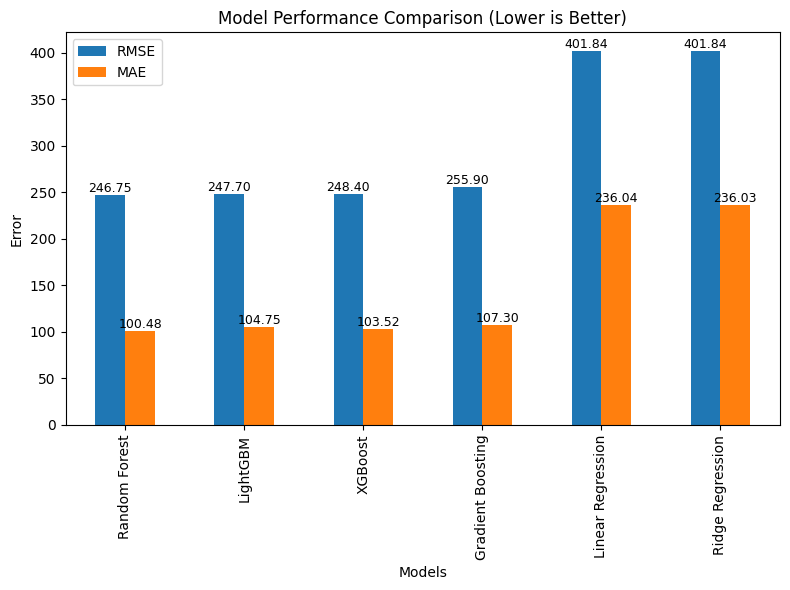

In [50]:
# Convert results dict → DataFrame
results_df = pd.DataFrame(results).T[["RMSE", "MAE"]]

# Sort by RMSE ascending
results_df = results_df.sort_values("RMSE", ascending=True)

# Plot RMSE and MAE
ax = results_df.plot(kind="bar", figsize=(8, 6), rot=90)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)

plt.title("Model Performance Comparison (Lower is Better)")
plt.ylabel("Error")
plt.xlabel("Models")
plt.tight_layout()
plt.show()

## Feature Importance


 Feature Importance for Random Forest


C:\Users\Joan Gathu\AppData\Local\Temp\ipykernel_20220\2042839859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=importances.values, y=importances.index,  palette="Blues_r")


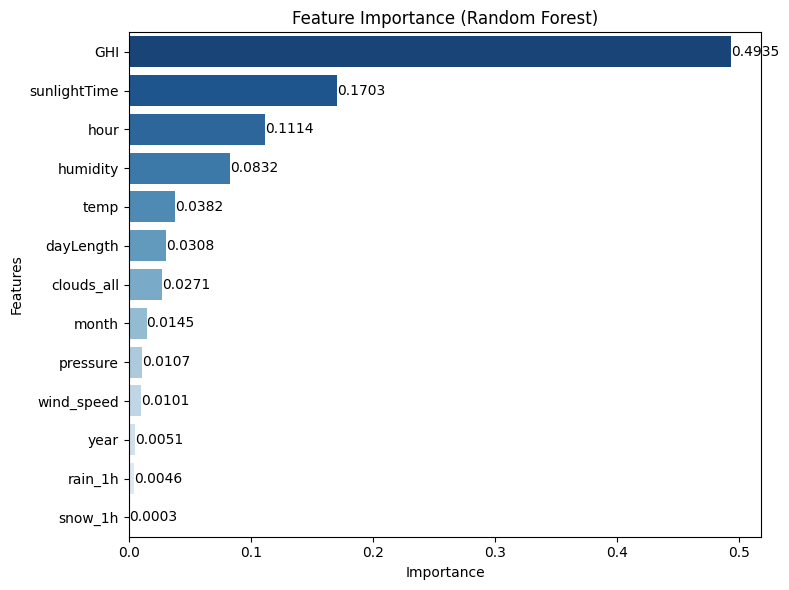

In [55]:
# Feature Importance using the best model
print(f"\n Feature Importance for {best_name}")

if hasattr(best_model, "feature_importances_"):  # tree-based
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
elif hasattr(best_model, "coef_"):  # linear
    importances = pd.Series(best_model.coef_, index=X.columns)
else:
    importances = None

if importances is not None:
    importances = importances.sort_values(ascending=False)
    
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=importances.values, y=importances.index,  palette="Blues_r") 

    # Add value annotations to bars
    for i, v in enumerate(importances.values):
        ax.text(v, i, f"{v:.4f}", color="black", va="center")

    plt.title(f"Feature Importance ({best_name})")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()
else:
    print(" This model does not support feature importance.")

## Saving the best model and scaler

In [54]:
# Use joblib  to save your trained model
# best_model = models[best_model_name]
import joblib

# Save Best Model
joblib.dump(best_model, "best_model.pkl")
print(f"Best model saved as best_model.pkl")

#saving scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")


Best model saved as best_model.pkl
Scaler saved as scaler.pkl
